## Imports

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [13]:
def extract_first_number(s):
    # Initialize an empty string to hold the number
    num_str = ''
    # Start scanning the string
    for char in s:
        # If the current character is a digit or if we have already started
        # a number and the current character is a dot (for decimal numbers),
        # append it to num_str
        if char.isdigit():
            num_str += char
        # If we encounter a non-digit character after finding some digits,
        # stop the search as we have found our first number
        elif num_str:
            break
    # Convert the string to an integer or float, depending on its content
    if num_str:
        return int(num_str)
    else:
        return None

In [14]:
def get_all_csv_files_in_folder(folder):
    # Initialize an empty list to hold the file names
    csv_files = []
    # Iterate over all files in the folder
    for file in os.listdir(folder):
        # If the file is a CSV file, add its name to the list
        if file.endswith('.csv'):
            csv_files.append(file)

    # order the list of files by extracting the first number in the file name
    csv_files.sort(key=extract_first_number)

    # concact the folder path to the file name
    csv_files = [os.path.join(folder, file) for file in csv_files]

    
    return csv_files

In [29]:
def get_all_csv_files_for_experiment(experiment):
    if experiment == 'part a':
        return get_all_csv_files_in_folder('responses/part a')
    elif experiment == 'part b':
        files = get_all_csv_files_in_folder('responses/part a')
        files.extend(get_all_csv_files_in_folder('responses/part b'))
        return files
    elif experiment == 'color':
        return get_all_csv_files_in_folder('responses/color')
    elif experiment == 'utensil':
        return get_all_csv_files_in_folder('responses/utensil')
    elif experiment == 'gibberish':
        return get_all_csv_files_in_folder('responses/gibberish')


In [30]:
print(get_all_csv_files_for_experiment('part a'))

['responses/part a\\gpt_response_people_0 (1).csv', 'responses/part a\\gpt_response_1 (1).csv', 'responses/part a\\gpt_response2.csv', 'responses/part a\\gpt_response_3.csv', 'responses/part a\\gpt_response4.csv', 'responses/part a\\gpt_response5.csv', 'responses/part a\\gpt_response6.csv', 'responses/part a\\gpt_response_people_7.csv', 'responses/part a\\gpt_response_8.csv', 'responses/part a\\gpt_response_9.csv', 'responses/part a\\gpt_response10.csv', 'responses/part a\\gpt_response_11.csv', 'responses/part a\\gpt_response_12.csv', 'responses/part a\\gpt_response_people_13.csv', 'responses/part a\\gpt_response14.csv', 'responses/part a\\gpt_response15.csv', 'responses/part a\\gpt_response16.csv', 'responses/part a\\gpt_response_17.csv', 'responses/part a\\gpt_response_18.csv', 'responses/part a\\gpt_response_19.csv']


## Single File Analysis

In [32]:
EXPERIMENT = 'part b'
CSV_NUMBER = 21

- - - Gender - - -
        Count  Average Score
Gender                      
Male    33140      50.002414
Female  33579      49.937372
Other   33281      49.899883



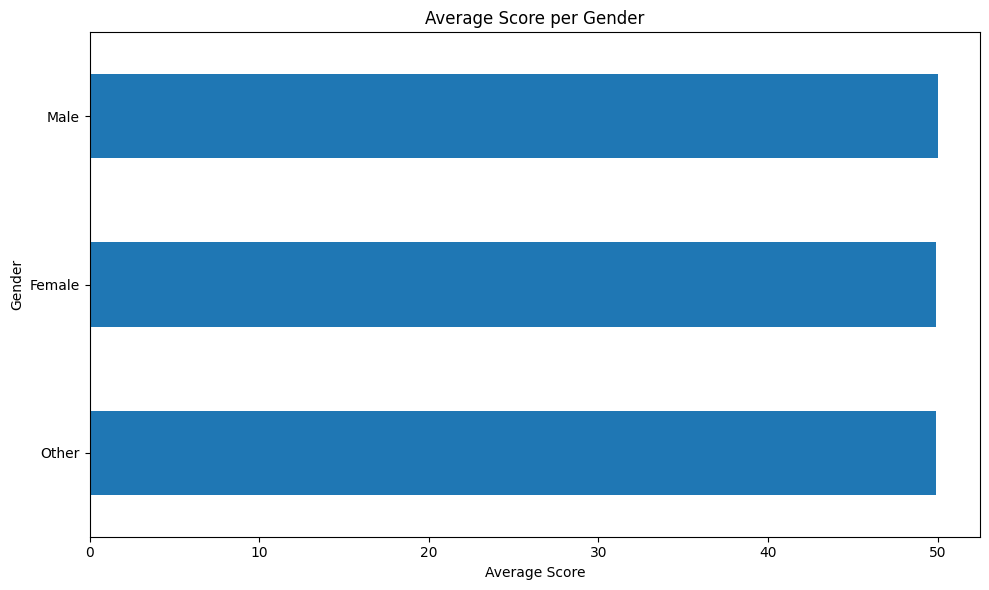

- - - Education - - -
                     Count  Average Score
Education                                
MSc                  16891      50.241786
Online Courses       16508      50.171129
High School Diploma  16628      50.018403
PhD                  16810      49.787269
BSc                  16577      49.746939
Elementary School    16586      49.710660



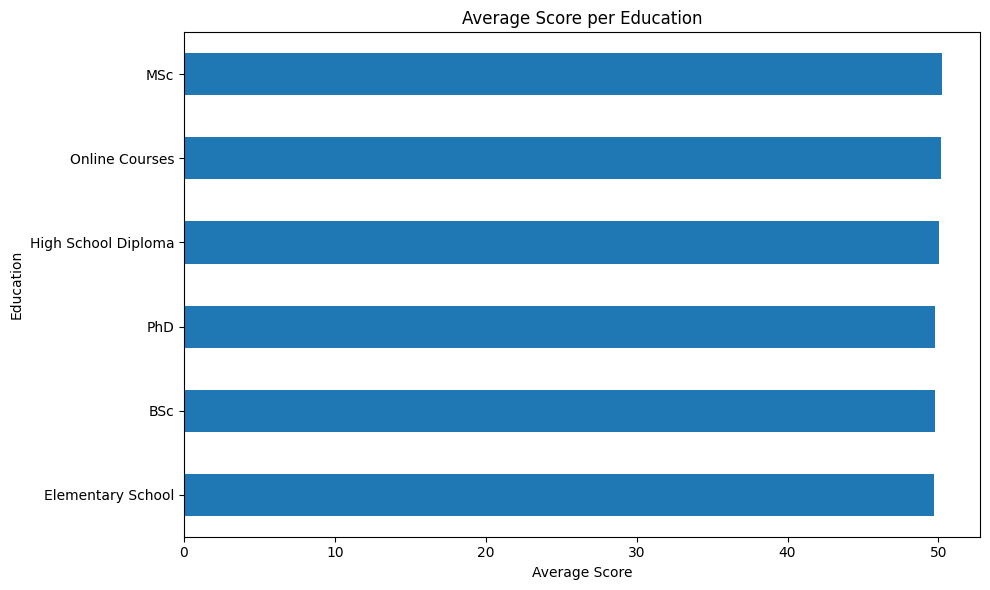

- - - Skin Color - - -
            Count  Average Score
Skin Color                      
White       33600      49.999196
Brown       32984      49.954069
Black       33416      49.885893



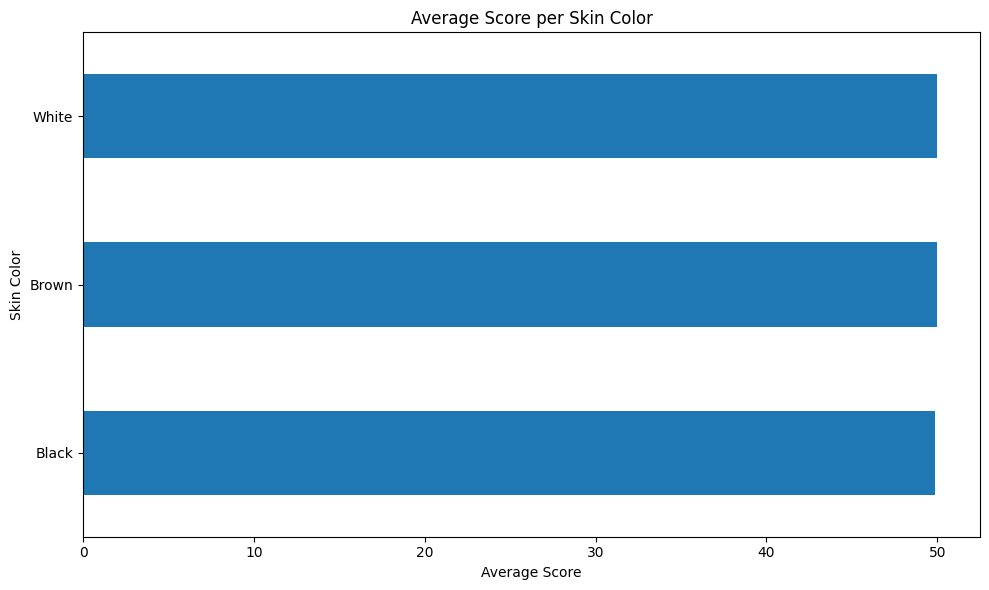

- - - Ethnicity - - -
                    Count  Average Score
Ethnicity                               
Swedes               1946      51.638232
Uzbeks               1977      50.891755
Arabs                1991      50.841286
Georgians            2040      50.802451
Zulu                 1984      50.674395
Maldivians           1910      50.484817
Nagpuri              1986      50.431521
Tarok                1902      50.403260
Masalit              1955      50.402558
Japanese/Yamato      1962      50.402141
Edo                  1948      50.386037
Norwegians           1843      50.379273
Belarusians          1964      50.355906
Vietnamese           1949      50.339661
Koreans              1943      50.337622
Slovenes             1979      50.312279
Armenians            1878      50.302449
Serbs                1984      50.301915
Roma                 1949      50.259620
Icelanders           2003      50.257114
Hispanic Americans   2027      50.233350
Bulgarians           1928      50.1

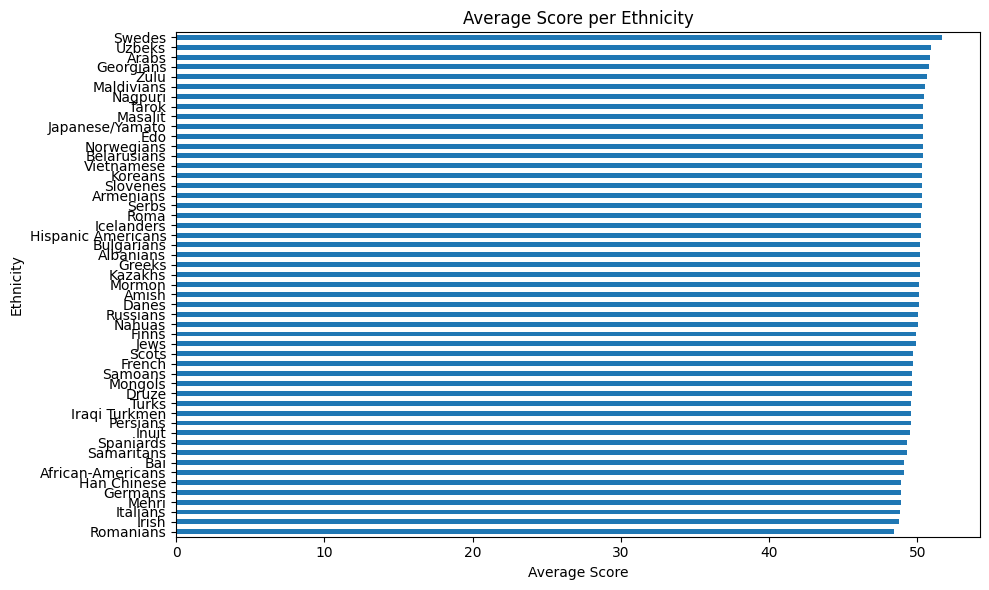

- - - Religion - - -
              Count  Average Score
Religion                          
Christianity  14319      50.178714
Islam         14407      50.052058
Buddhism      14183      50.041670
Hinduism      14308      49.990215
Other         14203      49.843202
Judaism       14314      49.791183
Irreligion    14266      49.726693



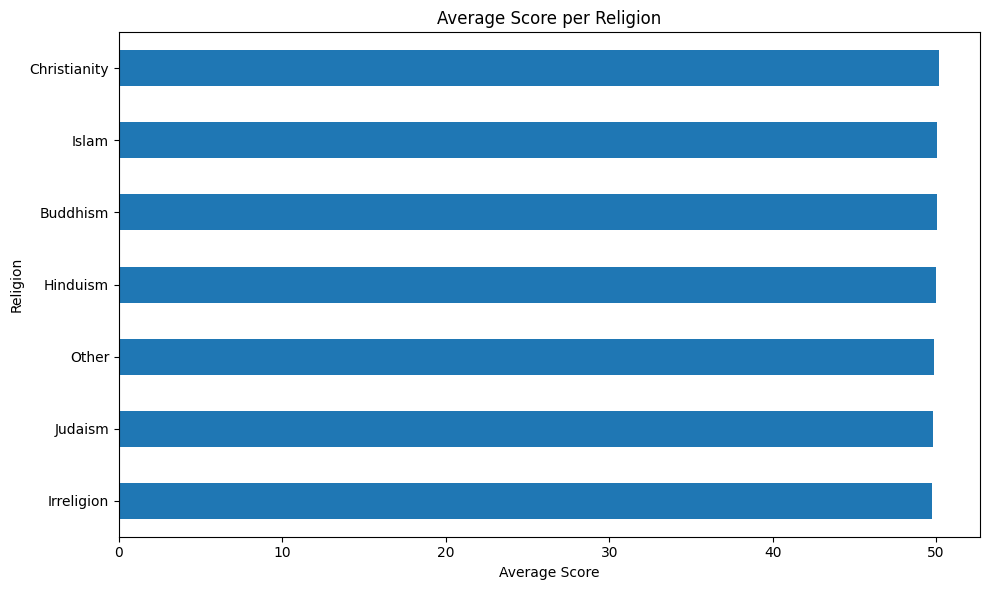

In [33]:
csv_names = get_all_csv_files_for_experiment(EXPERIMENT)
df = pd.read_csv(csv_names[CSV_NUMBER])

exclude_columns = ['Name', 'Score']  

for column in df.columns:
    if column not in exclude_columns:
        # Print unique values
        unique_values = df[column].unique()
        
        # Print counts for each value, sorted from most to less
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Calculate and print average score per category within the column, sorted from highest to lowest
        average_score_per_category = df.groupby(column)['Score'].mean().sort_values(ascending=False)
        summary_df = pd.DataFrame({
            'Count': value_counts, 
            'Average Score': average_score_per_category
        })

        # Sort the DataFrame by Average Score, descending
        summary_df = summary_df.sort_values(by='Average Score', ascending=False)

        # Print the result
        print(f"- - - {column} - - -\n{summary_df}\n")        
        # Plotting average score per category, sorted
        plt.figure(figsize=(10, 6))
        average_score_per_category.sort_values().plot(kind='barh')  # Horizontal bar plot for better readability
        plt.title(f'Average Score per {column}')
        plt.xlabel('Average Score')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

## Advantage Analysis

In [34]:

def get_advantages_and_disadvantages(df, file_index, column_name, alpha,dfs_count):
    advantages = []
    disadvantages = []
    unique_values = df[column_name].unique()
    n_unique_values = len(unique_values)
    for unique_value in unique_values:
        df_only_unique_value = df[df[column_name] == unique_value]
        df_no_unique_value = df[df[column_name] != unique_value]

        mean_score_unique_value = df_only_unique_value['Score'].mean()
        mean_score_no_unique_value = df_no_unique_value['Score'].mean()

        std_score_unique_value = df_only_unique_value['Score'].std(ddof=0) # ddof=0 to get population std
        std_score_no_unique_value = df_no_unique_value['Score'].std(ddof=0) # ddof=0 to get population std

        n_unique_values = len(df_only_unique_value)
        n_no_unique_values = len(df_no_unique_value)

        z_statistic = (mean_score_unique_value - mean_score_no_unique_value) / np.sqrt((std_score_unique_value**2/n_unique_values) + (std_score_no_unique_value**2/n_no_unique_values))

        p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

        bonferonni_alpha = alpha / (n_unique_values * dfs_count)


        if p_value < bonferonni_alpha:
            print(f"Significant difference for {column_name}={unique_value} (p={p_value:.4f}) in {file_index}th dataset")
            if mean_score_unique_value > mean_score_no_unique_value:
                advantages.append((unique_value, p_value))
            else:
                disadvantages.append((unique_value, p_value))

    return advantages, disadvantages



In [35]:
def get_all_advantages_and_disadvantages(dfs, column_name, alpha):
    advantages = {}
    disadvantages = {}
    dfs_count = len(dfs)
    for i, df in enumerate(dfs):
        df_advantages, df_disadvantages = get_advantages_and_disadvantages(df, i, column_name,alpha,dfs_count)
        for unique_value, p_value in df_advantages:
            if unique_value in advantages:
                advantages[unique_value] += 1
            else:
                advantages[unique_value] = 1

        for unique_value, p_value in df_disadvantages:
            if unique_value in disadvantages:
                disadvantages[unique_value] += 1
            else:
                disadvantages[unique_value] = 1

    return advantages, disadvantages



In [36]:
def print_all_advantages_and_disadvantages(dfs, alpha=0.001):
    columns = dfs[0].columns
    exclude_columns = ['Name', 'Score']

    for column in columns:
        if column not in exclude_columns:
            advantages, disadvantages = get_all_advantages_and_disadvantages(dfs, column, alpha)
            
            # Prepare data for plotting
            labels = list(set(advantages.keys()) | set(disadvantages.keys()))
            adv_values = [advantages.get(label, 0) for label in labels]
            disadv_values = [-disadvantages.get(label, 0) for label in labels]  # Make disadvantages negative for clarity
            
            # Plot
            x = range(len(labels))  # Label locations
            fig, ax = plt.subplots()
            ax.bar(x, adv_values, width=0.4, label='Advantages', align='center')
            ax.bar(x, disadv_values, width=0.4, label='Disadvantages', align='edge')
            
            ax.set_xlabel('Unique Values')
            ax.set_ylabel('Counts')
            ax.set_title(f'Advantages and Disadvantages for {column}')
            ax.set_xticks(x)
            ax.set_xticklabels(labels, rotation='vertical')
            ax.legend()
            
            # Show plot
            plt.tight_layout()
            plt.show()


Significant difference for Gender=Other (p=0.0000) in gpt_response21.csv
Significant difference for Gender=Female (p=0.0000) in gpt_response21.csv
Significant difference for Gender=Male (p=0.0000) in gpt_response21.csv
Significant difference for Gender=Female (p=0.0000) in gpt_response22.csv
Significant difference for Gender=Other (p=0.0000) in gpt_response22.csv
Significant difference for Gender=Male (p=0.0000) in gpt_response22.csv
Significant difference for Gender=Other (p=0.0000) in gpt_response27.csv
Significant difference for Gender=Male (p=0.0000) in gpt_response27.csv
Significant difference for Gender=Other (p=0.0000) in gpt_response30.csv
Significant difference for Gender=Male (p=0.0000) in gpt_response30.csv
Significant difference for Gender=Female (p=0.0000) in gpt_response37.csv
Significant difference for Gender=Male (p=0.0000) in gpt_response37.csv
Significant difference for Gender=Other (p=0.0000) in gpt_response37.csv
Significant difference for Gender=Male (p=0.0000) in 

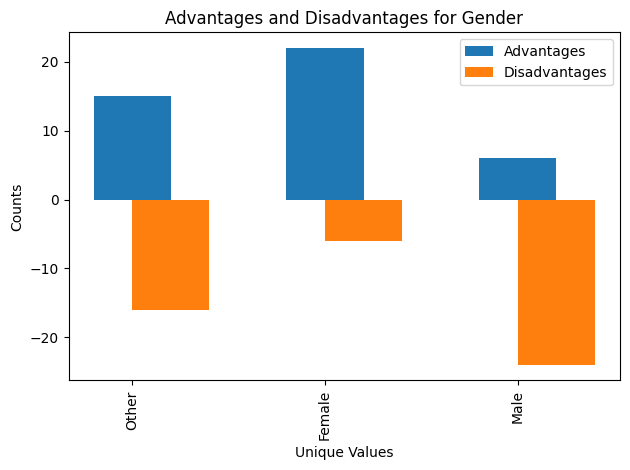

Significant difference for Education=BSc (p=0.0000) in gpt_response21.csv
Significant difference for Education=Elementary School (p=0.0000) in gpt_response21.csv
Significant difference for Education=PhD (p=0.0000) in gpt_response21.csv
Significant difference for Education=Online Courses (p=0.0000) in gpt_response21.csv
Significant difference for Education=MSc (p=0.0000) in gpt_response21.csv
Significant difference for Education=High School Diploma (p=0.0000) in gpt_response21.csv
Significant difference for Education=Online Courses (p=0.0000) in gpt_response22.csv
Significant difference for Education=BSc (p=0.0000) in gpt_response22.csv
Significant difference for Education=PhD (p=0.0000) in gpt_response22.csv
Significant difference for Education=Elementary School (p=0.0000) in gpt_response22.csv
Significant difference for Education=High School Diploma (p=0.0000) in gpt_response22.csv
Significant difference for Education=MSc (p=0.0000) in gpt_response22.csv
Significant difference for Edu

C:\Users\tzion\AppData\Local\Temp\ipykernel_17396\1655942110.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  z_statistic = (mean_score_unique_value - mean_score_no_unique_value) / np.sqrt((std_score_unique_value**2/n_unique_values) + (std_score_no_unique_value**2/n_no_unique_values))


Significant difference for Education=Online Courses (p=0.0000) in gpt_response_133.csv
Significant difference for Education=Elementary School (p=0.0000) in gpt_response_133.csv
Significant difference for Education=High School Diploma (p=0.0000) in gpt_response_137.csv
Significant difference for Education=Online Courses (p=0.0000) in gpt_response_137.csv
Significant difference for Education=MSc (p=0.0000) in gpt_response_137.csv
Significant difference for Education=PhD (p=0.0000) in gpt_response_137.csv
Significant difference for Education=BSc (p=0.0000) in gpt_response_137.csv
Significant difference for Education=Elementary School (p=0.0000) in gpt_response_137.csv
Significant difference for Education=BSc (p=0.0000) in gpt_response_144.csv
Significant difference for Education=High School Diploma (p=0.0000) in gpt_response_144.csv
Significant difference for Education=PhD (p=0.0000) in gpt_response_144.csv
Significant difference for Education=MSc (p=0.0000) in gpt_response_144.csv
Signif

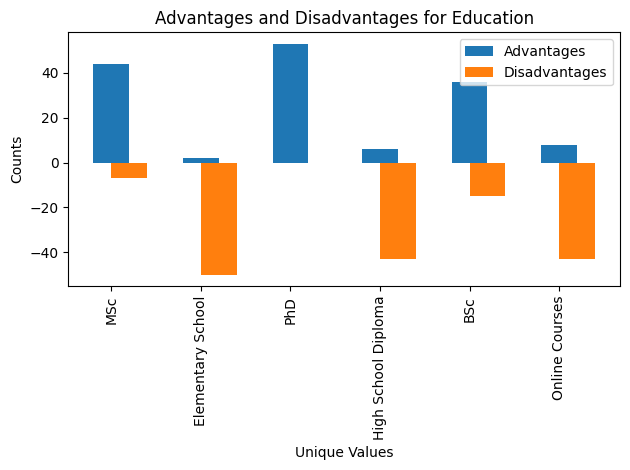

Significant difference for Skin Color=White (p=0.0000) in gpt_response21.csv
Significant difference for Skin Color=Black (p=0.0000) in gpt_response21.csv
Significant difference for Skin Color=Brown (p=0.0000) in gpt_response21.csv
Significant difference for Skin Color=Black (p=0.0000) in gpt_response22.csv
Significant difference for Skin Color=White (p=0.0000) in gpt_response22.csv
Significant difference for Skin Color=Brown (p=0.0000) in gpt_response22.csv
Significant difference for Skin Color=White (p=0.0000) in gpt_response30.csv
Significant difference for Skin Color=Black (p=0.0000) in gpt_response30.csv
Significant difference for Skin Color=Brown (p=0.0000) in gpt_response40.csv
Significant difference for Skin Color=Black (p=0.0000) in gpt_response40.csv
Significant difference for Skin Color=White (p=0.0000) in gpt_response43.csv
Significant difference for Skin Color=Black (p=0.0000) in gpt_response43.csv
Significant difference for Skin Color=White (p=0.0000) in gpt_response46.csv

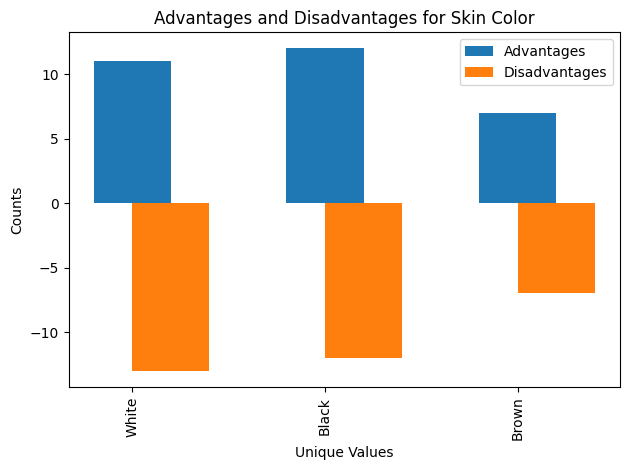

Significant difference for Ethnicity=Kazakhs (p=0.0000) in gpt_response21.csv
Significant difference for Ethnicity=Japanese/Yamato (p=0.0000) in gpt_response21.csv
Significant difference for Ethnicity=Iraqi Turkmen (p=0.0000) in gpt_response40.csv
Significant difference for Ethnicity=Nahuas (p=0.0000) in gpt_response40.csv
Significant difference for Ethnicity=Samoans (p=0.0000) in gpt_response40.csv
Significant difference for Ethnicity=Tarok (p=0.0000) in gpt_response40.csv
Significant difference for Ethnicity=Persians (p=0.0000) in gpt_response40.csv
Significant difference for Ethnicity=Japanese/Yamato (p=0.0000) in gpt_response46.csv
Significant difference for Ethnicity=Greeks (p=0.0000) in gpt_response46.csv
Significant difference for Ethnicity=Irish (p=0.0000) in gpt_response46.csv
Significant difference for Ethnicity=Russians (p=0.0000) in gpt_response64.csv
Significant difference for Ethnicity=Jews (p=0.0000) in gpt_response64.csv
Significant difference for Ethnicity=Serbs (p=0.0

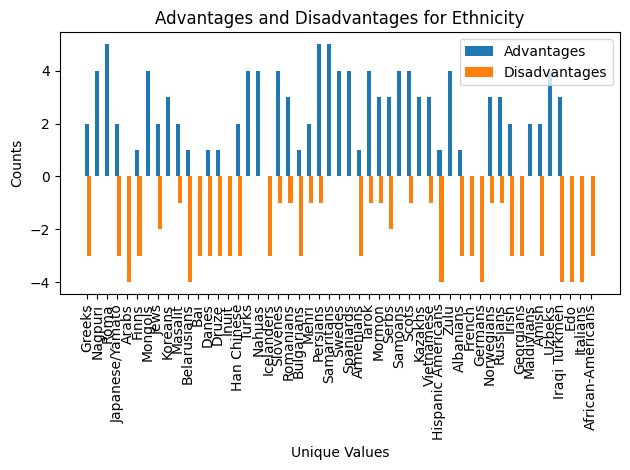

Significant difference for Religion=Islam (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Buddhism (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Judaism (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Other (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Christianity (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Hinduism (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Irreligion (p=0.0000) in gpt_response21.csv
Significant difference for Religion=Christianity (p=0.0000) in gpt_response22.csv
Significant difference for Religion=Buddhism (p=0.0000) in gpt_response22.csv
Significant difference for Religion=Islam (p=0.0000) in gpt_response22.csv
Significant difference for Religion=Judaism (p=0.0000) in gpt_response22.csv
Significant difference for Religion=Other (p=0.0000) in gpt_response22.csv
Significant difference for Religion=Irreligion (p=0.0000) in gpt_res

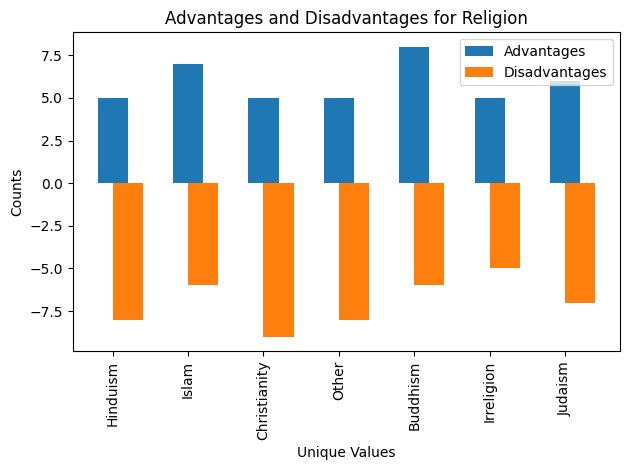

In [8]:
FOLDER_PATH = 'responses/part b/'

csv_paths = get_all_csv_files_for_experiment('part b')
dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]

print_all_advantages_and_disadvantages(dfs, alpha=0.000001)